In [1]:
# 선형회귀 모델 - 모델 생성 3가지로 구현
import tensorflow as tf  # 텐서플로 기본 모듈
from keras.models import Sequential  # 순차형(Sequential) 모델
from keras.layers import Dense, Input  # 완전연결층(Dense), 입력 정의(Input)
from keras import optimizers  # 옵티마이저 구성에 사용 (예: SGD, Adam)
import numpy as np  # 수치 연산 및 배열 처리

# 공부시간에 따른 성적 데이터 이용
x_data = np.array([1,2,3,4,5], dtype=np.float32).reshape(-1,1)  # 입력(공부시간), 2D로 변환
y_data = np.array([11,32,53,64,70], dtype=np.float32).reshape(-1,1)  # 타깃(점수), 2D로 변환

2025-09-11 17:47:55.648788: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-11 17:47:55.648969: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-11 17:47:55.648987: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-11 17:47:55.649177: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-11 17:47:55.649209: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100


2025-09-11 17:47:56.309091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5/5 - 0s - 79ms/step - loss: 2442.1006 - mse: 2442.1006
Epoch 2/100
5/5 - 0s - 7ms/step - loss: 1577.2526 - mse: 1577.2526
Epoch 3/100
5/5 - 0s - 6ms/step - loss: 441.7519 - mse: 441.7519
Epoch 4/100
5/5 - 0s - 6ms/step - loss: 48.0199 - mse: 48.0199
Epoch 5/100
5/5 - 0s - 6ms/step - loss: 38.7845 - mse: 38.7845
Epoch 6/100
5/5 - 0s - 6ms/step - loss: 50.9260 - mse: 50.9260
Epoch 7/100
5/5 - 0s - 6ms/step - loss: 31.4986 - mse: 31.4986
Epoch 8/100
5/5 - 0s - 6ms/step - loss: 46.2829 - mse: 46.2829
Epoch 9/100
5/5 - 0s - 6ms/step - loss: 35.0615 - mse: 35.0615
Epoch 10/100
5/5 - 0s - 6ms/step - loss: 45.6847 - mse: 45.6847
Epoch 11/100
5/5 - 0s - 6ms/step - loss: 50.1032 - mse: 50.1032
Epoch 12/100
5/5 - 0s - 6ms/step - loss: 51.3760 - mse: 51.3760
Epoch 13/100
5/5 - 0s - 6ms/step - loss: 46.7413 - mse: 46.7413
Epoch 14/100
5/5 - 0s - 6ms/step - loss: 33.3943 - mse: 33.3943
Epoch 15/100
5/5 - 0s - 6ms/step - loss: 39.1155 - mse: 39.1155
Epoch 16/100
5/5 - 0s - 6ms/step - loss: 47.2475 -

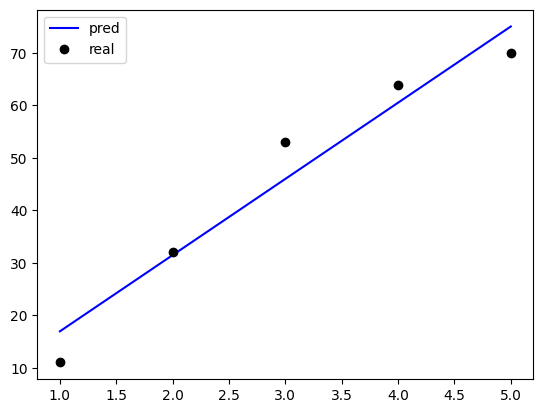

In [2]:
# 방법 1 Sequential API 사용 - 모델 구성이 순차적(단순) 경우에 사용한다.
model = Sequential() # 계층 구조(Linear layer Stack)
model.add(Input((1,)))  # 입력 차원: 1
model.add(Dense(units=16, activation='relu'))  # 은닉층 16, ReLU 활성화
model.add(Dense(units=1, activation='linear'))  # 출력층 1, 회귀(선형)

print(model.summary())

opti = optimizers.SGD(learning_rate=0.001)  # 경사하강법 옵티마이저
model.compile(optimizer=opti, loss='mse', metrics=['mse'])  # 손실:MSE, 지표:MSE

history = model.fit(x=x_data, y=y_data, batch_size=1, epochs=100, verbose=2)  # 학습 수행
loss_metrics = model.evaluate(x=x_data, y=y_data, verbose=0)  # 학습 데이터 평가
print('loss_metrics : ', loss_metrics)  # [loss, mse]

from sklearn.metrics import r2_score  # 결정계수(R^2) 계산
y_pred = model.predict(x_data)  # 예측값 계산
print('예측값 : ', y_pred.ravel())
print('실제값 : ', y_data.ravel())
print('셜명력 : ', r2_score(y_data, y_pred))  # 설명력(R^2)

# 새 데이터(n ,1)로 예측
new_data = np.array([1.5, 2.2, 5.8], dtype=np.float32).reshape(-1,1)  # 새로운 입력
new_pred = model.predict(new_data).ravel()  # 새 입력 예측
print('새 예상점수 : ', new_pred)

# 시각화
import matplotlib.pyplot as plt
plt.plot(x_data.ravel(), y_pred.ravel(), c='b', label='pred')
plt.plot(x_data.ravel(), y_data.ravel(), 'ko', label='real')
plt.legend()
plt.show()
plt.close()

In [5]:
# 방법 2 Functional API 사용 - 유연한 구조, 입력 데이터로 여러 층을 공유, 다양한 종류의 입출력 가능
# multi-input model, multi-output model, 고유층 활용 모델, 비순차적 데이터 처리
from keras.models import Model  # 함수형 API 모델 클래스

# inputs = Input(shape=(1,))
# outputs = Dense(1, activation='linear')(input)
# model = Model(inputs, outputs)

inputs = Input(shape=(1,))  # 입력 정의(특성 1)
output1 = Dense(1, activation='relu')(inputs)  # 은닉층(1유닛, ReLU)
output2 = Dense(1, activation='linear')(output1)  # 출력층(회귀)
# 이전 층을 다음 층 함수에 입력으로 사용하기 위해 변수에 할당
model2 = Model(inputs, output2)  # 입출력으로 모델 생성
# [inputs,] - input 여러 개 가능

opti2 = optimizers.SGD(learning_rate=0.0001)  # Stochastic Gradient Descent 옵티마이저
model2.compile(optimizer=opti2, loss='mse', metrics=['mse'])  # 손실/지표 설정

history = model2.fit(x=x_data, y=y_data, batch_size=1, epochs=100, verbose=2)  # 학습
loss_metrics = model2.evaluate(x=x_data, y=y_data, verbose=0)  # 평가
print('loss_metrics : ', loss_metrics)  # [loss, mse]

from sklearn.metrics import r2_score  # R^2 계산
y_pred2 = model2.predict(x_data)  # 예측
print('예측값 : ', y_pred2.ravel())
print('실제값 : ', y_data.ravel())
print('셜명력 : ', r2_score(y_data, y_pred2))  # 설명력(R^2)


Epoch 1/100
5/5 - 0s - 34ms/step - loss: 1981.5104 - mse: 1981.5104
Epoch 2/100
5/5 - 0s - 6ms/step - loss: 1789.1365 - mse: 1789.1365
Epoch 3/100
5/5 - 0s - 16ms/step - loss: 1563.0295 - mse: 1563.0295
Epoch 4/100
5/5 - 0s - 6ms/step - loss: 1311.1719 - mse: 1311.1719
Epoch 5/100
5/5 - 0s - 6ms/step - loss: 1048.1877 - mse: 1048.1877
Epoch 6/100
5/5 - 0s - 6ms/step - loss: 794.1942 - mse: 794.1942
Epoch 7/100
5/5 - 0s - 6ms/step - loss: 568.3827 - mse: 568.3827
Epoch 8/100
5/5 - 0s - 6ms/step - loss: 383.8976 - mse: 383.8976
Epoch 9/100
5/5 - 0s - 6ms/step - loss: 248.5686 - mse: 248.5686
Epoch 10/100
5/5 - 0s - 6ms/step - loss: 157.4973 - mse: 157.4973
Epoch 11/100
5/5 - 0s - 6ms/step - loss: 98.8067 - mse: 98.8067
Epoch 12/100
5/5 - 0s - 6ms/step - loss: 64.7177 - mse: 64.7177
Epoch 13/100
5/5 - 0s - 6ms/step - loss: 45.8066 - mse: 45.8066
Epoch 14/100
5/5 - 0s - 6ms/step - loss: 35.7477 - mse: 35.7477
Epoch 15/100
5/5 - 0s - 6ms/step - loss: 31.0875 - mse: 31.0875
Epoch 16/100
5/5 

In [ ]:
# 방법 3 sub classing 사용 - 고난이도 작업에서 활용성이 높음. 동적인 구조에 적합
# from keras import layers  # 레이어 유틸(예: Conv, Dense 등)

class MyModel(Model):  # Keras Model을 상속하여 사용자 정의 모델 작성
    def __init__(self):  # 서브클래스 초기화
        super(MyModel, self).__init__()  # 상위(Model) 초기화 호출
        self.d1 = Dense(16, activation='relu')  # 은닉층(유닛 16, ReLU)
        self.d2 = Dense(1, activation='linear')  # 출력층(회귀용 선형 활성화)
    
    # call: 순전파(Forward) 로직 정의. 함수형 API와 달리 별도 Input 객체 불필요
    # 추가적인 계산/분기/반복 등 동적 제어 가능, model.fit()/evaluate()/predict() 시 자동 호출
    def call(self, x):  # x: 입력 텐서(batch, 1)
        x = self.d1(x)  # Dense(16, ReLU) 통과
        return self.d2(x)  # Dense(1, Linear) 출력

model3 = MyModel()  # 모델 인스턴스화

opti3 = optimizers.SGD(learning_rate=0.001)  # SGD 옵티마이저
model3.compile(optimizer=opti3, loss='mse', metrics=['mse'])  # 손실/지표 설정

history = model3.fit(x=x_data, y=y_data, batch_size=1, epochs=100, verbose=2)  # 학습
loss_metrics = model3.evaluate(x=x_data, y=y_data, verbose=0)  # 평가
print('loss_metrics : ', loss_metrics)  # [loss, mse]

from sklearn.metrics import r2_score  # R^2 계산
y_pred3 = model3.predict(x_data)  # 예측
print('예측값 : ', y_pred3.ravel())
print('실제값 : ', y_data.ravel())
print('셜명력 : ', r2_score(y_data, y_pred3))  # 설명력(R^2)


Epoch 1/100
5/5 - 0s - 41ms/step - loss: 1924.8824 - mse: 1924.8824
Epoch 2/100
5/5 - 0s - 6ms/step - loss: 286.0244 - mse: 286.0244
Epoch 3/100
5/5 - 0s - 6ms/step - loss: 55.4508 - mse: 55.4508
Epoch 4/100
5/5 - 0s - 6ms/step - loss: 36.5878 - mse: 36.5878
Epoch 5/100
5/5 - 0s - 6ms/step - loss: 52.2041 - mse: 52.2041
Epoch 6/100
5/5 - 0s - 6ms/step - loss: 54.1172 - mse: 54.1172
Epoch 7/100
5/5 - 0s - 6ms/step - loss: 47.4998 - mse: 47.4998
Epoch 8/100
5/5 - 0s - 6ms/step - loss: 58.0978 - mse: 58.0978
Epoch 9/100
5/5 - 0s - 6ms/step - loss: 34.2774 - mse: 34.2774
Epoch 10/100
5/5 - 0s - 6ms/step - loss: 55.6472 - mse: 55.6472
Epoch 11/100
5/5 - 0s - 6ms/step - loss: 29.2626 - mse: 29.2626
Epoch 12/100
5/5 - 0s - 6ms/step - loss: 30.1630 - mse: 30.1630
Epoch 13/100
5/5 - 0s - 6ms/step - loss: 59.2000 - mse: 59.2000
Epoch 14/100
5/5 - 0s - 6ms/step - loss: 55.1091 - mse: 55.1091
Epoch 15/100
5/5 - 0s - 6ms/step - loss: 38.6101 - mse: 38.6101
Epoch 16/100
5/5 - 0s - 6ms/step - loss: 7

In [ ]:
# 3-1 sub classing 사용
from keras.layers import Layer  # 사용자 정의 레이어를 만들기 위한 기반 클래스

# Layer 사용자 정의층 작성 예시
# 기존 layers에 없는 연산/편의 조합을 직접 구현할 때 사용
class MyLinear(Layer):  # 전결합 선형변환 y = xW + b 를 수행하는 커스텀 레이어
    def __init__(self, units=1, **kwargs):  # 출력 유닛 수 지정
        super(MyLinear, self).__init__(**kwargs)  # 상위(Layer) 초기화
        self.units = units  # 출력 차원 저장
        
    # build: 입력 형태를 바탕으로 가중치 생성(모델 최초 호출 시 1회)
    def build(self, input_shape):
        print('build: input_shape = ', input_shape)  # 디버깅용 출력
        self.w = self.add_weight(shape=(input_shape[-1], self.units),  # 가중치 W
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(self.units,),  # 편향 b
                                 initializer='zeros',
                                 trainable=True)
    
    # call: 순전파 로직. 정의된 가중치로 y = xW + b 계산
    def call(self, inputs):
        return tf.add(tf.matmul(inputs, self.w), self.b)
    
class MyMlp(Model):  # 사용자 정의 MLP 모델 (MyLinear 2층 + ReLU)
    def __init__(self, **kwargs):
        super(MyMlp, self).__init__(**kwargs)  # 상위(Model) 초기화
        self.linear1 = MyLinear(1)  # 1차 선형변환 레이어
        self.linear2 = MyLinear(1)  # 2차 선형변환 레이어
    
    def call(self, inputs):  # 순전파: 선형→ReLU→선형
        x = self.linear1(inputs)  # 첫 번째 선형변환
        x = tf.nn.relu(x)  # 비선형 활성화
        return self.linear2(x)  # 두 번째 선형변환(출력)
    
model4 = MyMlp()  # 모델 인스턴스화

opti4 = optimizers.SGD(learning_rate=0.001)  # SGD 옵티마이저
model4.compile(optimizer=opti4, loss='mse', metrics=['mse'])  # 손실/지표 설정

history = model4.fit(x=x_data, y=y_data, batch_size=1, epochs=100, verbose=2)  # 학습
loss_metrics = model4.evaluate(x=x_data, y=y_data, verbose=0)  # 평가
print('loss_metrics : ', loss_metrics)  # [loss, mse]

from sklearn.metrics import r2_score  # R^2 계산
y_pred4 = model4.predict(x_data)  # 예측
print('예측값 : ', y_pred4.ravel())
print('실제값 : ', y_data.ravel())
print('셜명력 : ', r2_score(y_data, y_pred4))  # 설명력(R^2)